In [15]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*1000, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')
# candlestick_day = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
hour_observe = 20

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
# data_prices['type_21'] = candlestick_type_by_hour(data_prices, 21)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 7)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 12)
# data_prices['type_7'] = candlestick_type_by_hour(data_prices, 13)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices['until_now'] = until_now_type(data_prices)



bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()






type_continuous
0     632
2     301
3     134
4      62
5      39
6      19
7       9
8       2
9       1
10      1
dtype: int64


<Figure size 720x720 with 0 Axes>

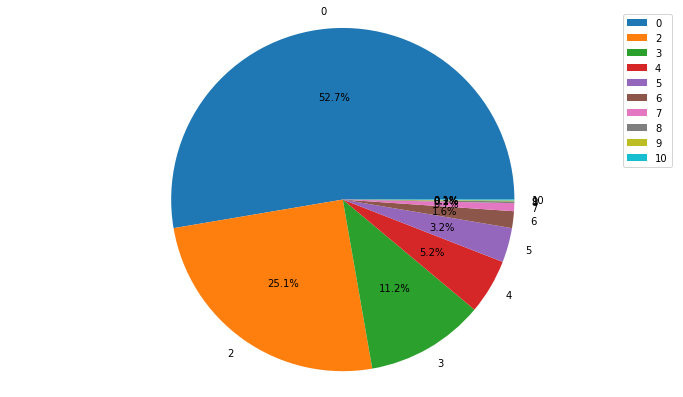

In [2]:
# data_prices['type_continuous'].hist(bins=20)

type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()




Giờ 20
________________________________
count    33.000000
mean      1.045195
std       0.841683
min       0.110497
25%       0.387324
50%       0.737826
75%       1.534829
max       3.493976
Name: hour_return, dtype: float64
34.4914260981496
+++
count    17.000000
mean     -0.720957
std       0.766579
min      -3.314607
25%      -0.853081
50%      -0.558659
75%      -0.362506
max      -0.050302
Name: hour_return, dtype: float64
-12.256276847245404
___________________________**KÊT QUẢ**___________________________
Tỉ lệ up/down: open               33
high               33
close              33
low                33
volumn             33
hour_return        33
day                33
hour               33
type               33
type_21            33
type_7             33
type_continuous    33
until_now          33
dtype: int64 - open               17
high               17
close              17
low                17
volumn             17
hour_return        17
day                17
hour       

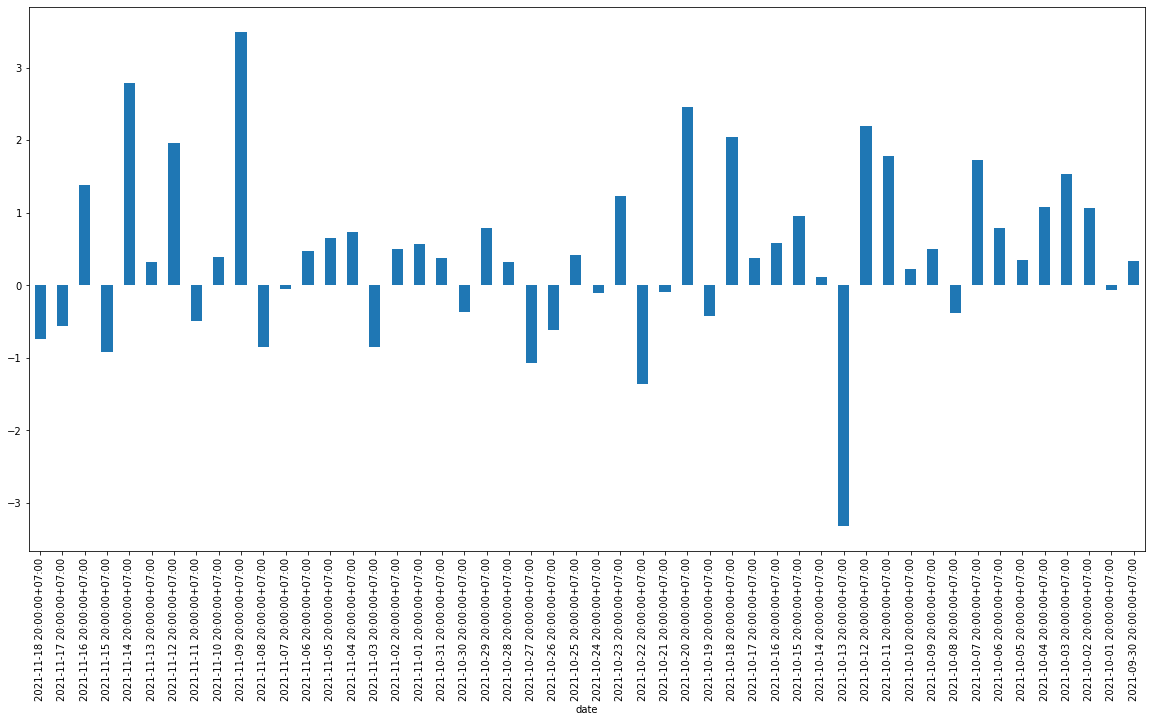

In [3]:
data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')
# data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

print("___________________________**KÊT QUẢ**___________________________")
print(f"Tỉ lệ up/down: {data_prices_up.count()} - {data_prices_down.count()}")
print(f"Tổng up = {data_prices_up['hour_return'].sum()}")
print(f"Tổng down = {data_prices_down['hour_return'].sum()}")

<AxesSubplot:xlabel='date'>

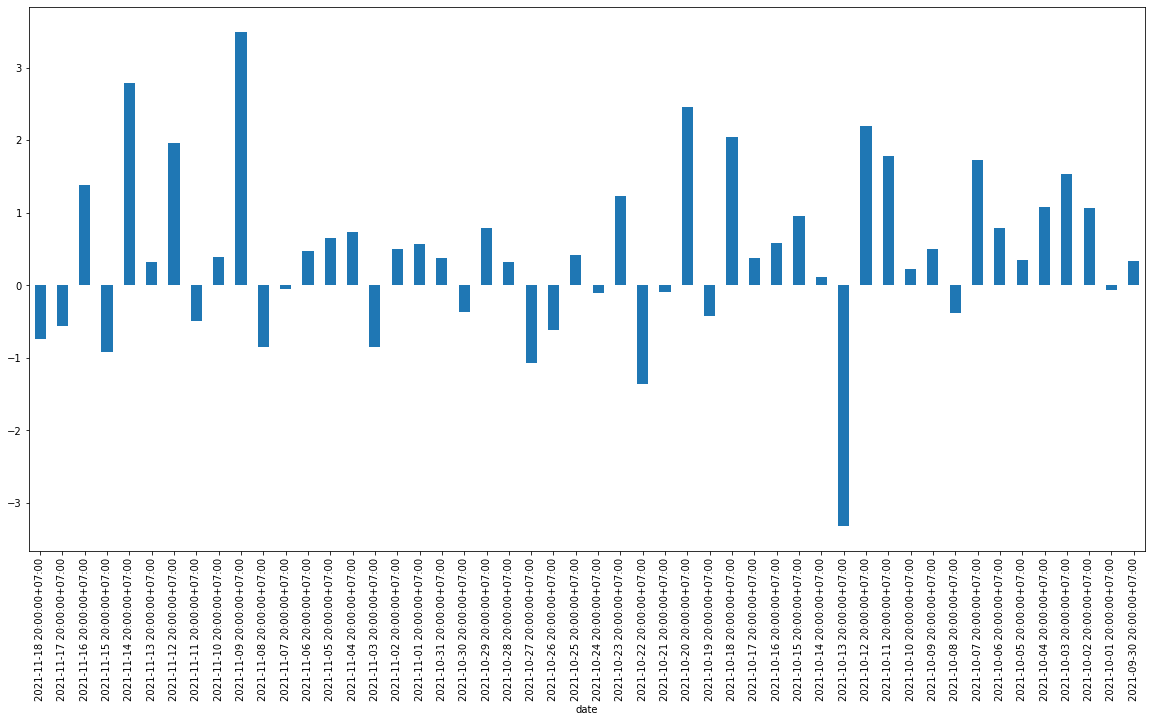

In [4]:
data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')

<AxesSubplot:>

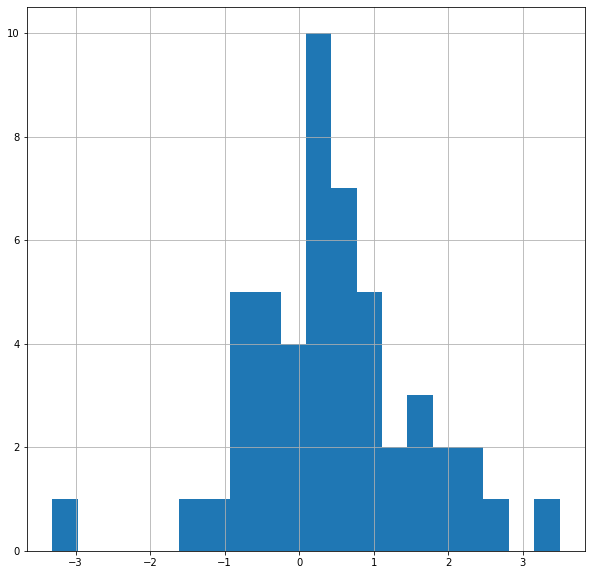

In [5]:
data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

In [6]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


,open,high,close,low,volumn,hour_return,day,hour,type,type_21,type_7,type_continuous,until_now
date,,,,,,,,,,,,,
2021-11-15 00:00:00+07:00,253.0,271.7,270.7,252.6,215318.0,6.996047,2021-11-15,0,up,up,up,0,up


In [7]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



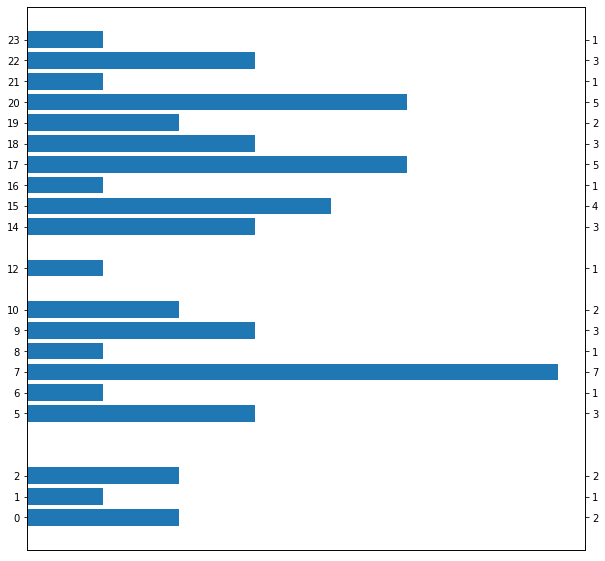

In [8]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()




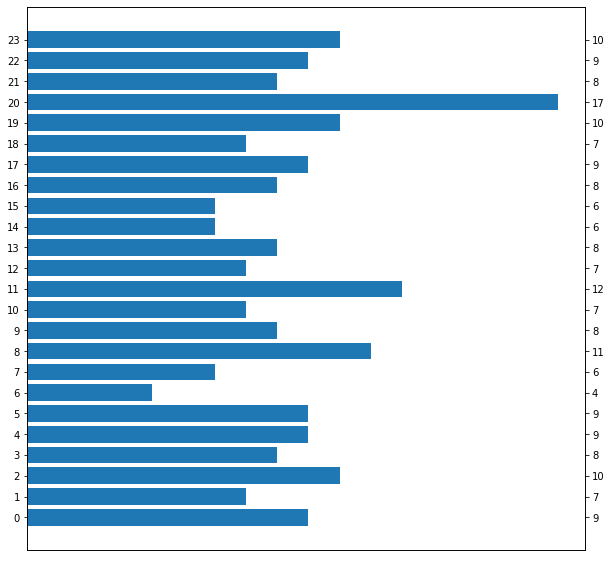

In [9]:
type_observe = 'down'

data_prices_h7 = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == type_observe)]

hour_correlate = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0,
    '10': 0,
    '11': 0,
    '12': 0,
    '13': 0,
    '14': 0,
    '15': 0,
    '16': 0,
    '17': 0,
    '18': 0,
    '19': 0,
    '20': 0,
    '21': 0,
    '22': 0,
    '23': 0
}

for value in data_prices_h7['day'].to_list():
    for i in np.arange(24):
        if i == hour_observe:
            continue;
        hour_type = data_prices[(data_prices['day']  == value) & (data_prices['hour'] == i)].type

        if hour_type.values.size > 0 and hour_type.values == [type_observe]:
            hour_correlate[f"{i}"] = hour_correlate[f"{i}"] + 1
            
hour_correlate[f"{hour_observe}"] = len(data_prices_h7)

list_hours = [int(hour) for hour in hour_correlate.keys()]
list_correlate = hour_correlate.values()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_correlate, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_correlate)

plt.show()



In [10]:
data_prices_20 = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_20['type_continuous_20'] = type_continuous(data_prices_20,'ASC')

print(data_prices_20)




                            open   high  close    low    volumn  hour_return  \
date                                                                           
2021-11-18 20:00:00+07:00  217.7  219.6  216.1  214.1   66841.1    -0.734956   
2021-11-17 20:00:00+07:00  232.7  234.3  231.4  231.2   35823.8    -0.558659   
2021-11-16 20:00:00+07:00  232.0  236.7  235.2  231.9   76868.7     1.379310   
2021-11-15 20:00:00+07:00  271.2  274.0  268.7  267.3   77267.6    -0.921829   
2021-11-14 20:00:00+07:00  254.4  262.2  261.5  253.9  112067.0     2.790881   
2021-11-13 20:00:00+07:00  245.9  248.1  246.7  245.7   30370.0     0.325336   
2021-11-12 20:00:00+07:00  260.3  265.5  265.4  257.0   77058.6     1.959278   
2021-11-11 20:00:00+07:00  265.2  266.0  263.9  261.4   72912.5    -0.490196   
2021-11-10 20:00:00+07:00  284.0  286.8  285.1  278.1  253971.0     0.387324   
2021-11-09 20:00:00+07:00  249.0  260.0  257.7  248.7  134397.0     3.493976   
2021-11-08 20:00:00+07:00  211.0  212.0 

<ipython-input-10-08487f409cfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_20['type_continuous_20'] = type_continuous(data_prices_20,'ASC')


In [11]:
from myenv.helpers.utils import phi_coefficient

print(phi_coefficient(data_prices_20, 'type', 'type_7'))

0.01524808410329653


In [3]:
import pandas as pd
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*1000, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')
# candlestick_day = Candlestick(merchandise_rate_id, 'day', 100, "DESC")
hour_observe = 20

data_prices = candlestick.to_df()

data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)
data_prices['type'] = candlestick_type(data_prices)


down_df = data_prices[data_prices['type'] == 'down'].groupby(['day'])['type'].size().reset_index(name='count_down')
up_df = data_prices[data_prices['type'] == 'up'].groupby(['day'])['type'].size().reset_index(name='count_up')

a = pd.merge(down_df, up_df, on=["day"])

